<a href="https://colab.research.google.com/github/Swapnadeepgit/ML_Classification_Algo/blob/main/sms_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Swapnadeep Ghosh (Data Science intern at Bharat Intern)

TASK NO.2 - Develop a text classification model to distinguish the sms as either spam or not spam or non spam using data science techniques in python.(The problem statement)

In [ ]:
#importing pandas and some sklearn models
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



In [ ]:
#importing the datasets
df = pd.read_csv('spam.csv', encoding='latin-1')
print(df.head())


     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [ ]:
#computing the data text length
df['text_len'] = df['v2'].apply(len)
df.head()

,v1,v2,text_len
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
# In[3]:

df = df[['v1', 'v2']]
df.columns = ['label', 'text']
df['label'] = df['label'].map({'ham': 0, 'spam': 1})


<ipython-input-8-96d07c265bc0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df['label'].map({'ham': 0, 'spam': 1})


In [ ]:
# In[4]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

In [ ]:
# In[5]:
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [ ]:
# In[6]:

model = MultinomialNB()
model.fit(X_train_vec, y_train)


MultinomialNB()

In [ ]:
# In[7]:
y_pred = model.predict(X_test_vec)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


In [ ]:
#checking the accuracy of the model
new_sms = ["get free byjus access! Click now!", "hey, are you busy?"]
new_sms_vec = vectorizer.transform(new_sms)
predictions = model.predict(new_sms_vec)

for sms, prediction in zip(new_sms, predictions):
    print(f"{sms} - {'Spam' if prediction == 1 else 'Non-Spam'}")

get free byjus access! Click now! - Spam
hey, are you busy? - Non-Spam


Text(50.722222222222214, 0.5, 'Actual')

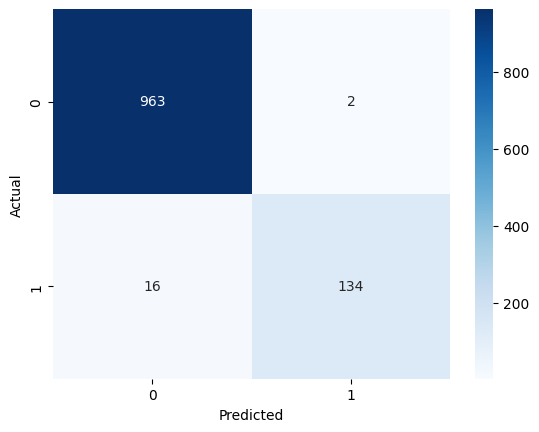

In [ ]:
#visualisation of the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')

Completion of the task , Thank you.



